Importuri

In [132]:
import numpy, matplotlib.pyplot as plt, scipy.io.wavfile as wavf, scipy.signal as sig, sounddevice, time

Exercitiul 1

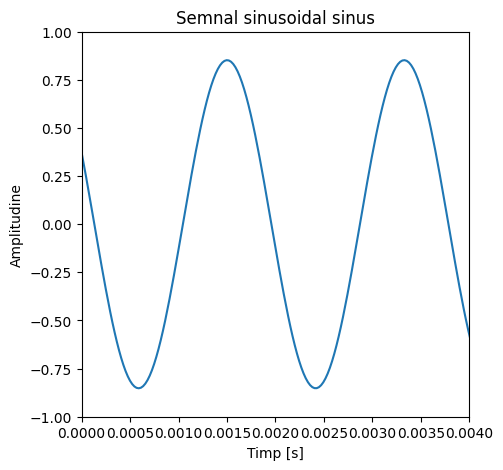

Finished first signal, waiting 2 seonds


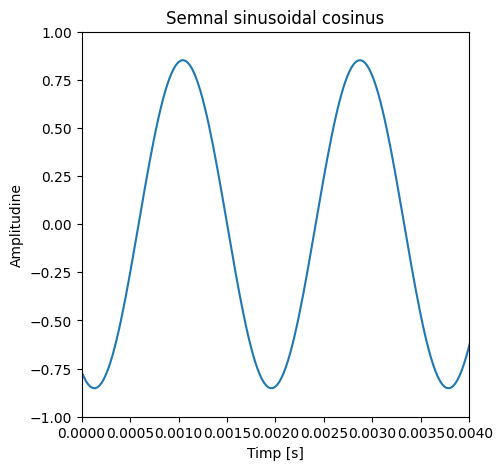

In [133]:
# Semnal sinusoidal de tip sinus 
amplitudine = numpy.random.uniform(0.5, 0.9)
frecventa = numpy.random.uniform(500, 1000)
faza = numpy.random.uniform(0, 2 * numpy.pi)
frecventa_de_esantionare = 44100
timp = 5
t = numpy.linspace(0,timp, int(timp * frecventa_de_esantionare))
semnal_sinus = amplitudine * numpy.sin(2 * numpy.pi * frecventa * t + faza)
plt.plot(t, semnal_sinus)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal sinus')
plt.xlim(0, 0.004)
plt.ylim(-1, 1)
plt.savefig(fname = './semnal_sinusoidal_sinus.pdf', format = 'pdf')
plt.show()

sounddevice.play(semnal_sinus, frecventa_de_esantionare)
rate = int(10e5)
wavf.write("semnal_sinusoidal_sinus.wav", rate, semnal_sinus)
print("Finished first signal, waiting 2 seonds")
time.sleep(2)
semnal_cosinus = amplitudine * numpy.sin(2 * numpy.pi * frecventa * t + faza + numpy.pi / 2)
plt.plot(t, semnal_cosinus)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal cosinus')
plt.xlim(0, 0.004)
plt.ylim(-1, 1)
plt.savefig(fname = './semnal_sinusoidal_sinus.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_cosinus, frecventa_de_esantionare)
wavf.write("semnal_sinusoidal_cosinus.wav", rate, semnal_cosinus)

Exercitiul 2

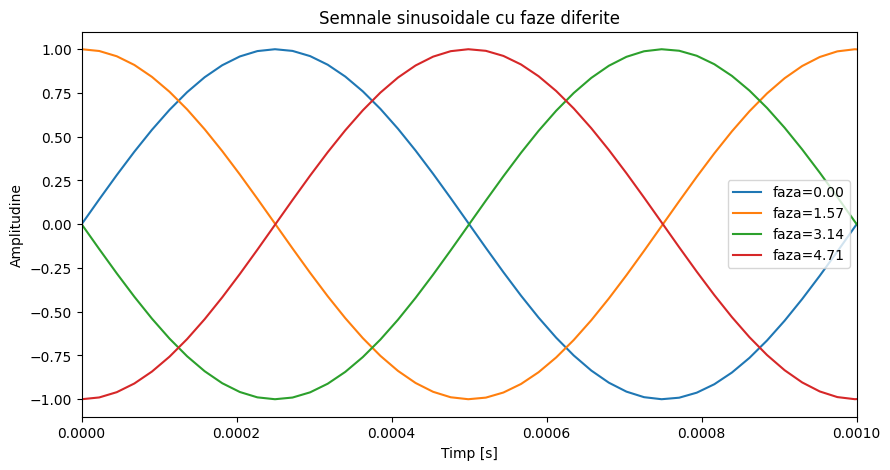

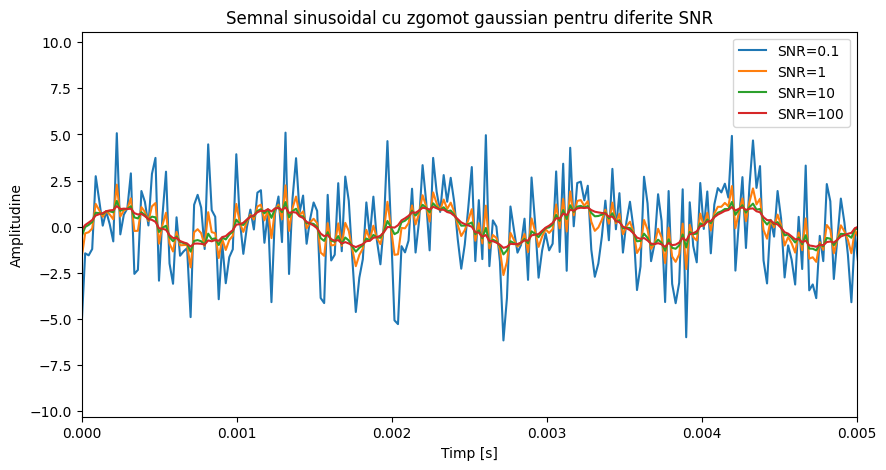

In [134]:
frec = 1000
amplitudine_unitara = 1
timp = 1
frecventa_de_esantionare = 44100
t = numpy.linspace(0, timp, int(timp * frecventa_de_esantionare))
faze = [0, numpy.pi/2, numpy.pi, 3*numpy.pi/2]
semnale = [amplitudine_unitara * numpy.sin(2 * numpy.pi * frec * t + faza) for faza in faze]

plt.figure(figsize=(10,5))
for idx, semnal in enumerate(semnale):
    plt.plot(t, semnal, label=f'faza={faze[idx]:.2f}')
plt.xlim(0, 0.001)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnale sinusoidale cu faze diferite')
plt.legend()
plt.savefig(fname = './semnale_sinusoidale_cu_faze_diferite.pdf', format = 'pdf')
plt.show()

z = numpy.random.normal(0, 1, t.shape)
x = semnale[0]
snr_values = [0.1, 1, 10, 100]
noisy_signals = []

for snr in snr_values:
    gamma = numpy.linalg.norm(x) / (numpy.sqrt(snr) * numpy.linalg.norm(z))
    x_noisy = x + gamma * z
    noisy_signals.append(x_noisy)

plt.figure(figsize=(10,5))
for idx, x_noisy in enumerate(noisy_signals):
    plt.plot(t, x_noisy, label=f'SNR={snr_values[idx]}')
plt.xlim(0, 0.005)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal cu zgomot gaussian pentru diferite SNR')
plt.legend()
plt.savefig(fname = './semnal_sinusoidal_cu_zgomot_gaussian.pdf', format = 'pdf')
plt.show()


Exercitiul 3

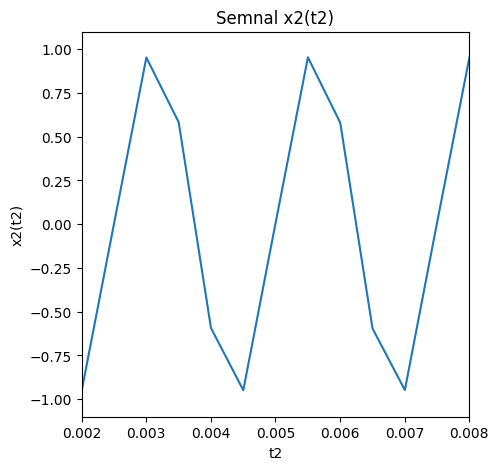

In [135]:
# Sunetul de la 2 a) din laboratorul precedent
frec_a = 400
nr_samples = 1600
rate = 2000
t2 = numpy.linspace(0, nr_samples / rate, nr_samples)  # rate in loc de frec_a pentru a auzi
x2 = numpy.sin(2 * numpy.pi * frec_a * t2)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(t2, x2)
plt.xlabel('t2')
plt.ylabel('x2(t2)')
plt.title('Semnal x2(t2)')
plt.xlim(0.002, 0.008)
plt.show()
sounddevice.play(x2, rate)
sounddevice.wait()
wavf.write("semnal_x2_400frecventa.wav", rate, x2)
rata, semnal = wavf.read("semnal_x2_400frecventa.wav")
sounddevice.play(semnal, rata)
sounddevice.wait()  

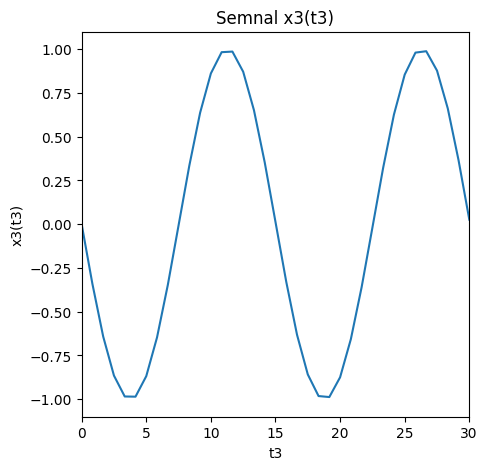

In [136]:
# Sunetul de la 2 b) din laboratorul precedent
frec_b = 800
duration_b = 3
nr_samples_b = int(frec_b * duration_b)
t3 = numpy.linspace(0, rate, nr_samples_b) # rata in loc de duration_b pentru a auzi
x3 = numpy.sin(2 * numpy.pi * frec_b * t3)
plt.plot(t3, x3)
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('t3')
plt.ylabel('x3(t3)')
plt.title('Semnal x3(t3)')
plt.xlim(0, 30)
plt.show()
sounddevice.play(x3, rate)
wavf.write("semnal_x3_800frecventa.wav", rate, x2)
sounddevice.wait()
rata, semnal = wavf.read("semnal_x3_800frecventa.wav")
sounddevice.play(semnal, rata)
sounddevice.wait()

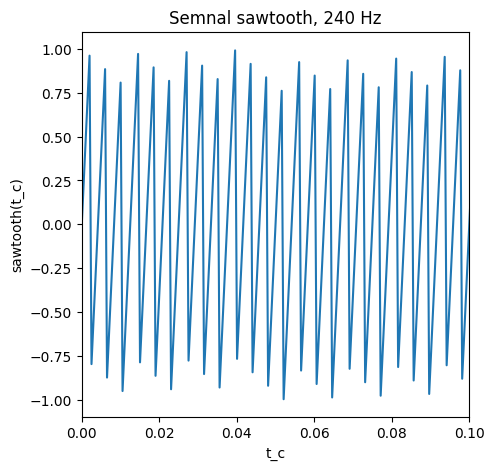

In [137]:
# Sunetul de la 2 c) din laboratorul precedent
frec_c = 240
duration_c = 0.3 # durata crescuta pentru a auzi sunetul
fs_c = 2000  
t_c = numpy.linspace(0, duration_c, int(fs_c * duration_c))
saw_c = 2 * (t_c * frec_c - numpy.floor(0.5 + t_c * frec_c))  # amplitudine [-1, 1]
plt.plot(t_c, saw_c)
plt.xlabel('t_c')
plt.xlim(0, 0.1)
plt.ylabel('sawtooth(t_c)')
plt.title('Semnal sawtooth, 240 Hz')
plt.show()
sounddevice.play(saw_c, fs_c)
wavf.write("semnal_sawtooth_240frecventa.wav", fs_c, saw_c)
sounddevice.wait()
rata, semnal = wavf.read("semnal_sawtooth_240frecventa.wav")
sounddevice.play(semnal, rata)
sounddevice.wait()

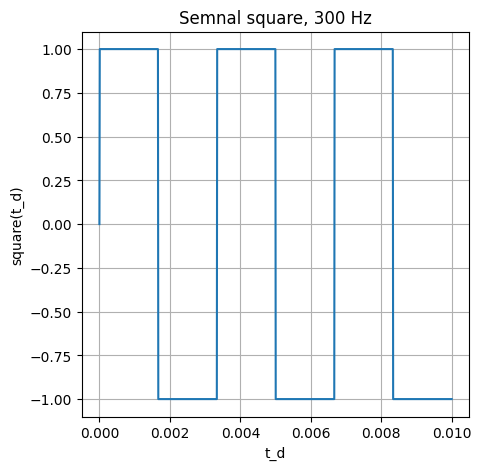

In [138]:
# Sunetul de la 2 d) din laboratorul precedent
frec_d = 300
duration_d = 0.01
fs_d = 100000
t_d = numpy.linspace(0, duration_d, int(fs_d * duration_d))
square_d = numpy.sign(numpy.sin(2 * numpy.pi * frec_d * t_d))
plt.plot(t_d, square_d)
plt.xlabel('t_d')
plt.ylabel('square(t_d)')
plt.title('Semnal square, 300 Hz')
plt.grid(True)
plt.show()
sounddevice.play(saw_c, fs_c)
wavf.write("semnal_square_300Hz.wav", fs_c, saw_c)
sounddevice.wait()
rata, semnal = wavf.read("semnal_square_300Hz.wav")
sounddevice.play(semnal, rata)
sounddevice.wait()